In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as sci

In [44]:
def f(t,y):
    # The right-hand side for the 2D gravity ODE
    dy = np.zeros((4,))
    dy[0] = y[2]
    dy[1] = y[3]
    aux = y[0]*y[0]+y[1]*y[1]
    dy[2] = -y[0]/aux
    dy[3] = -y[1]/aux
    return dy

# initial condition for the unit circle solution
y0 = np.array([1,0,0,1])

# for the exact solution
tt = np.linspace(0,2*np.pi,200)

Nloops = 2
tmax = Nloops*2*np.pi
for steps_per_loop in [1000]:#,40,80]:
    Nt = Nloops*steps_per_loop
    dt = 2*np.pi/steps_per_loop  
    sol = np.zeros((Nt+2,4))
    sol[0,:] = y0
    sol[1,:] = sol[0,:] + dt*f(t,sol[0,:])
    t = 0
    for j in range(Nt):
        j += 1
        # apply method from part (a)
        sol[j+1,:] = -4*sol[j,:] + 5*sol[j-1,:] + dt*(4*f(t,sol[j,:])+2*f(t-dt,sol[j-1,:]))
        #sol[j+1,:] = sol[j,:] + dt*f(t,sol[j,:])
        print(sol[j+1,:][:2])
        t = t + dt
        if np.linalg.norm(sol[j+1,:][:2])>=4:
            break
    #print(np.linalg.norm(sol[Nt+2,]))

[0.99984209 0.01256637]
[1.0002369  0.01884559]
[0.99763112 0.02515258]
[1.00979227 0.03126018]
[0.9478768  0.03863746]
[1.25613891 0.03826463]
[-0.2869075   0.08360039]
[ 7.42736766 -0.1344444 ]


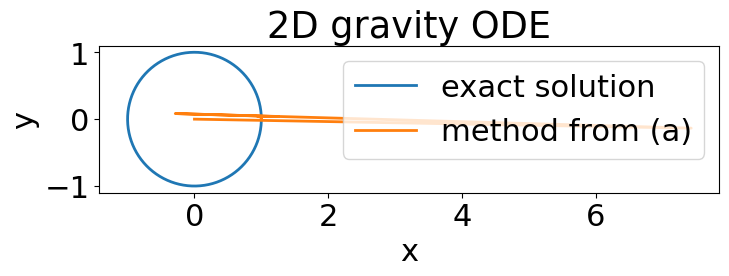

In [45]:
# plot the exact and computed solution
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(np.cos(tt),np.sin(tt),linewidth=2,label='exact solution')
plt.plot(sol[:,0],sol[:,1],linewidth=2,label='method from (a)')  
plt.title("2D gravity ODE")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
ax.set_aspect(1)